In [84]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [56]:
train,test = mnist.load_data() #Loading handwritten digits dataset with 28x28 images (labelled data)

In [88]:
X_train, Y_train = train #Splitting data into images and corresponding labels

In [89]:
X_test, Y_test = test

In [90]:
X_train.shape

(60000, 28, 28)

In [91]:
X_test.shape

(10000, 28, 28)

In [92]:
Y_train.shape

(60000,)

In [93]:
Y_test.shape 

(10000,)

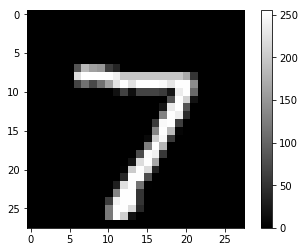

In [94]:
import matplotlib.pyplot as plt #Displaying the image using plotting library
plt.imshow(X_test[0],cmap='gray')
plt.colorbar()
plt.show()

In [95]:
#Normalizing data to bring in range 0 to 1 from 0 to 255
X_train = X_train/255
X_test = X_test/255

In [96]:
X_train.shape

(60000, 28, 28)

In [97]:
X_train = X_train.reshape(-1,X_train.shape[1]*X_train.shape[2])
X_test =  X_test.reshape(-1,X_test.shape[1]*X_test.shape[2])

In [98]:
X_train.shape #Flattened the images from 28x28 to 784 to feed to neural network neurons

(60000, 784)

In [99]:
print(Y_test[0])

7


In [100]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [101]:
print(Y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [102]:
#Adding layers and activations
model = Sequential() #Making a feed-forward artificial neural network with sequential layers
model.add(Dense(128,activation='relu',input_shape=(784,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [103]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                170       
Total params: 109,946
Trainable params: 109,946
Non-trainable params: 0
_________________________________________________________________


In [105]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])
                                        #'categorical_crossentropy'])
#Categorical crossentropy is used to define error for multiple classes (0 to 9 in this case)
#Adam optimizer uses a combination of RMSProp and Gradient Descent Optimization technique
#We are judging the model on its accuracy

In [106]:
#Training the model using the training data
model.fit(X_train,Y_train,batch_size=1000,
          epochs=40,validation_split=0.2)
#All the above parameters in fit function are hyperparameters, change them and experiment with them to see what different results can be found

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 2s 41us/step - loss: 1.3252 - acc: 0.5253 - val_loss: 0.6177 - val_acc: 0.8422
Epoch 2/40
48000/48000 [==============================] - 1s 24us/step - loss: 0.4282 - acc: 0.8889 - val_loss: 0.2813 - val_acc: 0.9238
Epoch 3/40
48000/48000 [==============================] - 1s 23us/step - loss: 0.2533 - acc: 0.9302 - val_loss: 0.2085 - val_acc: 0.9422
Epoch 4/40
48000/48000 [==============================] - 1s 20us/step - loss: 0.1912 - acc: 0.9463 - val_loss: 0.1742 - val_acc: 0.9513
Epoch 5/40
48000/48000 [==============================] - 1s 20us/step - loss: 0.1542 - acc: 0.9563 - val_loss: 0.1501 - val_acc: 0.9577
Epoch 6/40
48000/48000 [==============================] - 1s 25us/step - loss: 0.1288 - acc: 0.9625 - val_loss: 0.1389 - val_acc: 0.9603
Epoch 7/40
48000/48000 [==============================] - 1s 24us/step - loss: 0.1130 - acc: 0.9674 - val_loss: 0.1280 - val_acc

In [107]:
#calculating test accuracy
import numpy as np
total = len(X_test)
Y_pred = model.predict(X_test)
corr=0
for i in range(len(X_test)):
    if np.argmax(Y_pred[i]) == np.argmax(Y_test[i]):
        corr+=1

In [108]:
print(Y_pred[0])

[9.5751861e-12 4.7174291e-09 9.3421767e-07 2.4554733e-05 4.2259760e-16
 2.1630954e-12 2.5344562e-21 9.9997425e-01 3.3572153e-08 2.4189265e-07]


In [109]:
test_accuracy = corr/total

In [110]:
test_accuracy

0.9761

In [29]:
#working of argmax
np.argmax(Y_pred[0])

7

In [30]:
np.argmax(Y_test[0])

7